170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 47ms/step - accuracy: 0.3561 - loss: 1.7239 - val_accuracy: 0.5293 - val_loss: 1.2983
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.5713 - loss: 1.2126 - val_accuracy: 0.6074 - val_loss: 1.1033
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.6304 - loss: 1.0452 - val_accuracy: 0.6451 - val_loss: 0.9967
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.6725 - loss: 0.9351 - val_accuracy: 0.6593 - val_loss: 0.9628
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.7055 - loss: 0.8363 - val_accuracy: 0.6671 - val_loss: 0.9382
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.7269 - loss: 0.7710 - val_accuracy: 0.6877 - val_loss: 0.9048
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.7461 - loss: 0.7293 - val_accuracy: 0.6801 - val_loss: 0.9568
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 46ms/step - accuracy: 0.7597 -

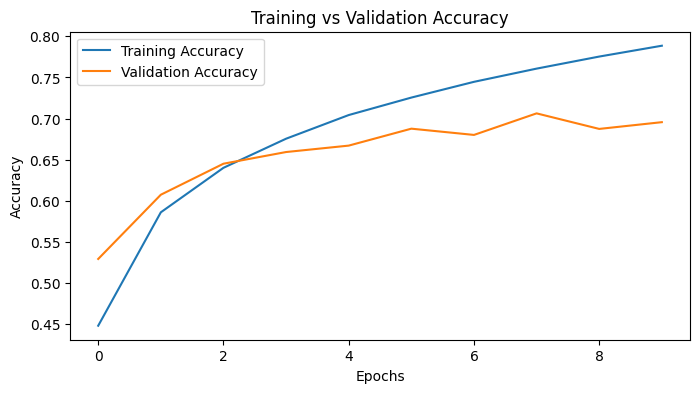

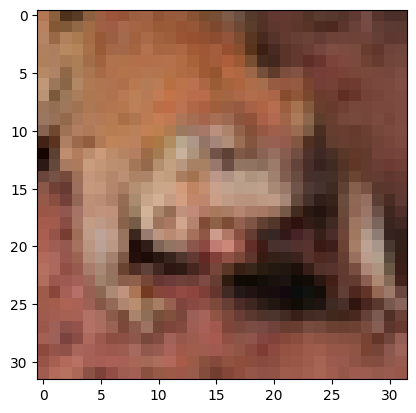

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Predicted Class: 6


In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Building CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test Accuracy:", test_acc)

# Plot training history
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.show()

# Making predictions
import numpy as np
index = 5
plt.imshow(x_test[index])
plt.show()
pred = model.predict(x_test[index].reshape(1,32,32,3))
print("Predicted Class:", np.argmax(pred))